In [23]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *
import pickle

# local imports
from modules.mesh_utils_V2 import get_mesh
from modules.plotting_utils_V2 import plot_elements,basic_plot_trajectories,plot_cas_test,neutralisation_cas_test,\
    vitesse_par_espece_cas_test,angle_par_espece_cas_test,vitesse_total_cas_test,angle_total_cas_test,\
    distribution_vitesse_1_cas,distribution_angle_1_cas
from modules.physics_utils_V3 import get_VandE, compute_trajectory
from modules.computing_utils_V3 import main

In [24]:
mesh_dict = { # we need L < L_mot
    'L_mot' : .005,
    'l_mot' : .003,
    'L_1' : .003, # dim_trou = L_mot-L = .002 ici
    'l_1': .001,
    'L_2' : .004, # dim_trou = .001 ici
    'l_2' : .01,
    'L_3' : 0.003,
    'l_3' : 0.0005,
    'delta_vert_12' : .001,
    'delta_vert_23' : .0003, 
    'L_vacuum' : .05,
    'l_vacuum': .02,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :30,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_electrode3':80,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'param densité neutre':(2e20,1e20),
    'rhoelec': 0,
    'l_rho':0, #dist between rho and 0 // <l_2 // if 0, we consider rhoelec uniform
    'PERMITTIVITY' : 8.54e-12,
    'CHARGE':1.6e-19,
    'M_NUCLEON':1.7e-27,
    'K_BOLTZMANN':1.38e-23,
}

integration_parameters_dict = { #Best ==> 'tmax' : .00002 and 'dt' : .00000001 and '%Nout':100
    'tmax' : .00001,
    'dt' : .00000005,
    '%Nout': 100,
}

injection_dict = {
    'Nombre de particules I- en entrée':1000,
    'débit de particule en entrée':1e9,
    'gamma':1,
    'Tion':25000,
    'Tneutre':300,
}

mode_dict={
    'Choc symétrique sur parois ?':False,   
    'Perte de charge sur parois ?':True,  
    'Perte d energie sur parois ?':True,  
    'Contact inter particules ?':True,   
    'X0 fixe ?':False,
    'param moy angle rebond' :(35.11032, 0.688338, 20.623960),
    'param sigma angle rebond' : (-0.021746, 2.24434),
    'param moy energie rebond' : (0.042475, 0.002134, 14.595268),
    'param sigma energie rebond' : (-0.000112, 0.015936),
}

In [25]:
phi_dict['Phi_electrode3']=phi_dict['Phi_electrode2']
mesh_dict['delta_vert_23']=1e-7
mesh_dict['l_3']=1e-7
mesh_dict['L_3']=1e-7

# mesh & E computations

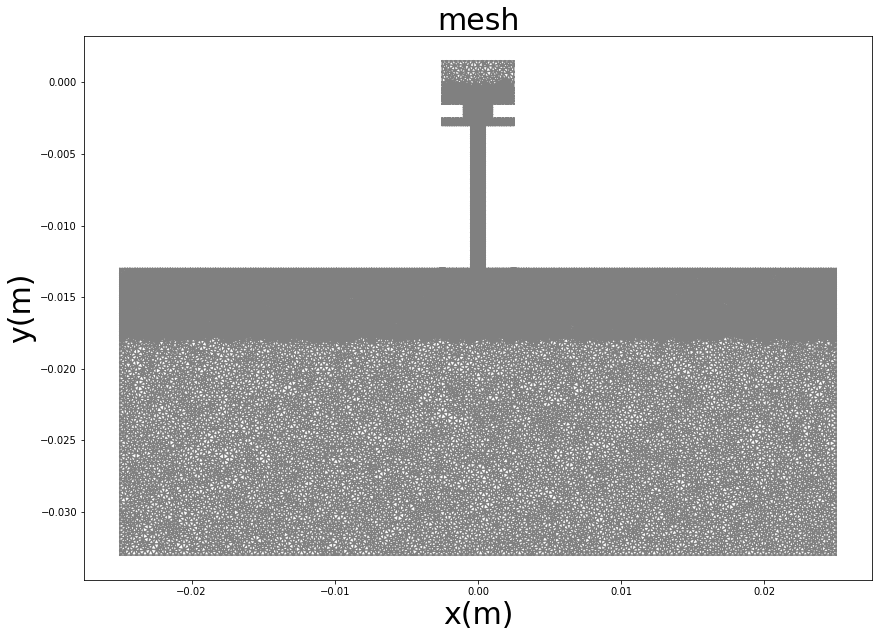

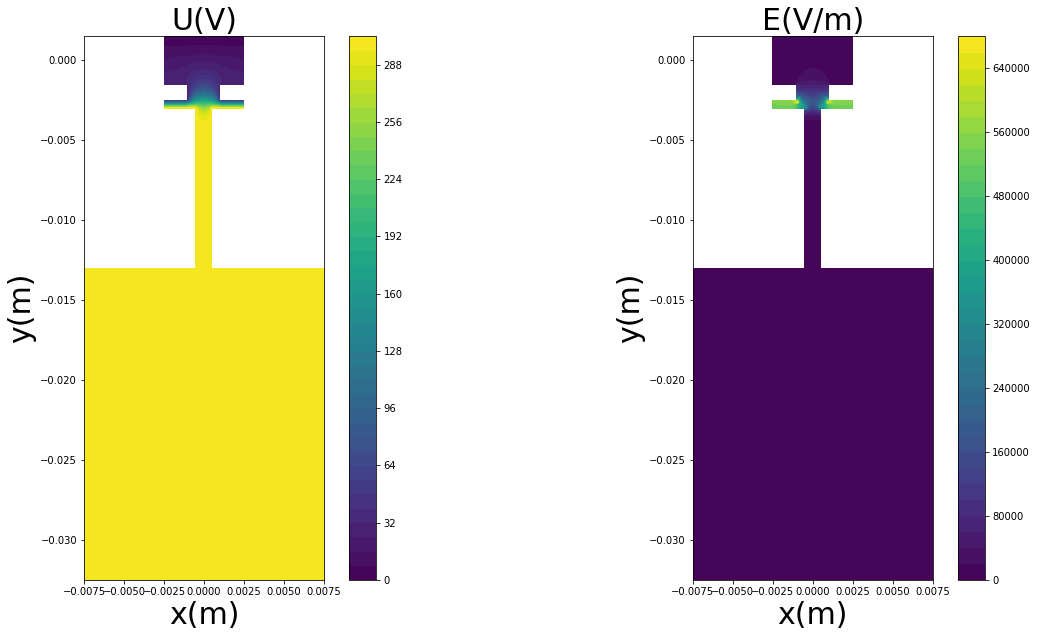

In [26]:
mesh, segments_list, zone = get_mesh(mesh_dict)
Phi, E, f = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)

plot_elements(mesh,E,Phi,mesh_dict,quality=True)

# Basic simulation

début d'initialisation
début de l'injection
Avancement de 0%, 0 particules sorties, 0 nouveaux ions
Avancement de 1%, 0 particules sorties, 1 nouveaux ions
Avancement de 2%, 0 particules sorties, 2 nouveaux ions
Avancement de 3%, 1 particules sorties, 2 nouveaux ions
Avancement de 4%, 3 particules sorties, 2 nouveaux ions
Avancement de 5%, 3 particules sorties, 2 nouveaux ions
Avancement de 6%, 3 particules sorties, 2 nouveaux ions
Avancement de 7%, 3 particules sorties, 2 nouveaux ions
Avancement de 8%, 3 particules sorties, 2 nouveaux ions
Avancement de 9%, 3 particules sorties, 2 nouveaux ions
Avancement de 10%, 3 particules sorties, 2 nouveaux ions
Avancement de 11%, 3 particules sorties, 2 nouveaux ions
Avancement de 12%, 3 particules sorties, 2 nouveaux ions
Avancement de 13%, 3 particules sorties, 2 nouveaux ions
Avancement de 14%, 3 particules sorties, 2 nouveaux ions
Avancement de 15%, 3 particules sorties, 2 nouveaux ions
Avancement de 16%, 3 particules sorties, 2 nouveaux io

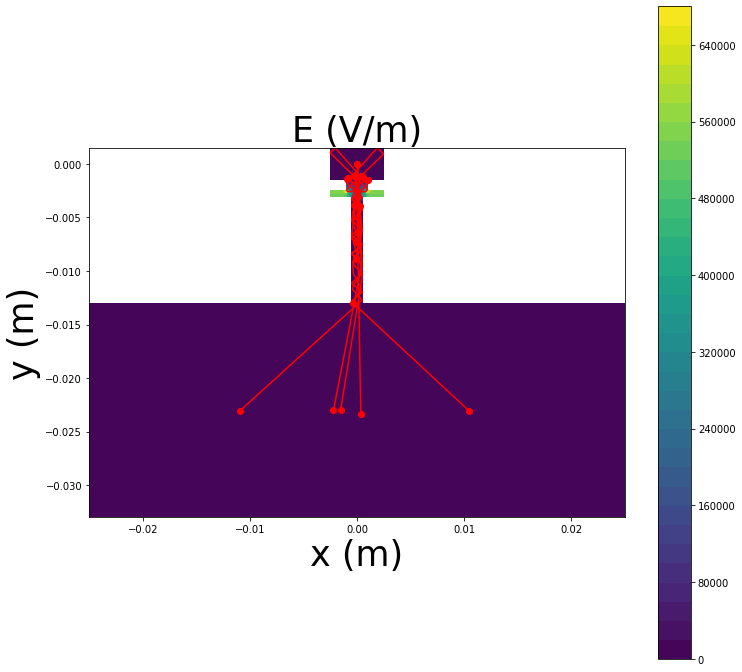

proportions finales de I,I- =  [0.2, 0.6]
proportions finales de l'angle de la vitesse de I,I- =  [0.8220167088291193, -0.11129489993265823]
proportions finales de la norme de la vitesse de I,I- =  [1227.019766861744, 18247.34072121036]


In [27]:
mem=injection_dict['Nombre de particules I- en entrée']
injection_dict['Nombre de particules I- en entrée']=10

Nb_out, pf_2_especes, alpha_moy_2_especes, alpha_sigma_2_especes, V_moy_2_especes, V_sigma_2_especes, \
listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t, \
liste_alpha_neutre, liste_alpha_ion, liste_V_neutre, liste_V_ion = \
compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list, zone, E, physics_consts_dict, True, False)

basic_plot_trajectories(E,listes_x,listes_y)
    
print('proportions finales de I,I- = ',pf_2_especes)
print("proportions finales de l'angle de la vitesse de I,I- = ",alpha_moy_2_especes)
print('proportions finales de la norme de la vitesse de I,I- = ',V_moy_2_especes)

injection_dict['Nombre de particules I- en entrée']=mem

# Cas test

In [18]:
liste_couples=[[.003,0.001],
              [0.004,0.001],
              [0.003,0.01],
              [0.004,0.01]] #L_2,l_2

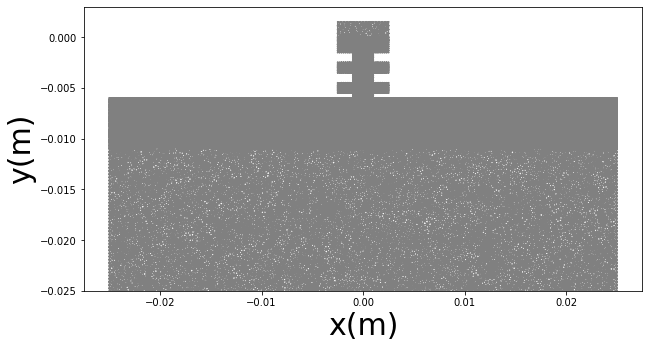

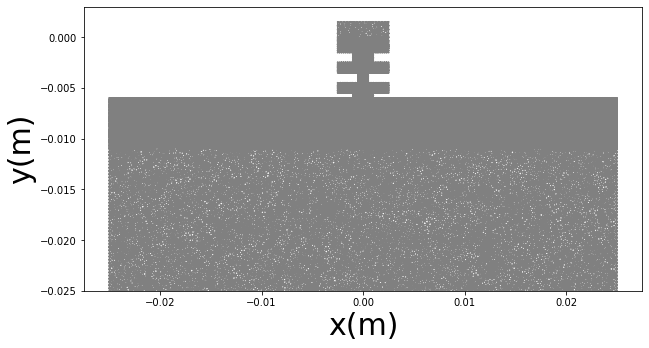

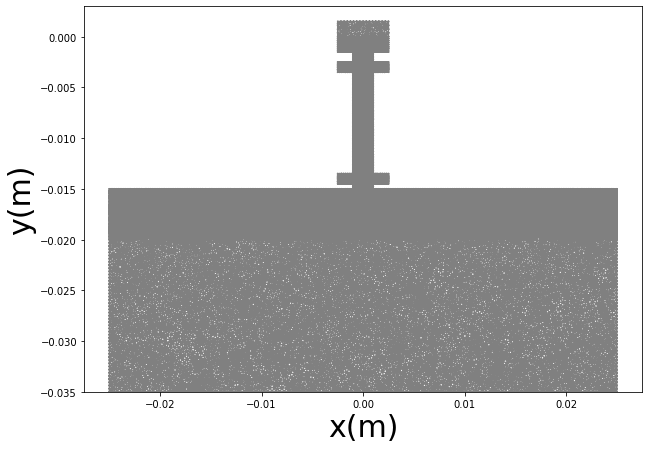

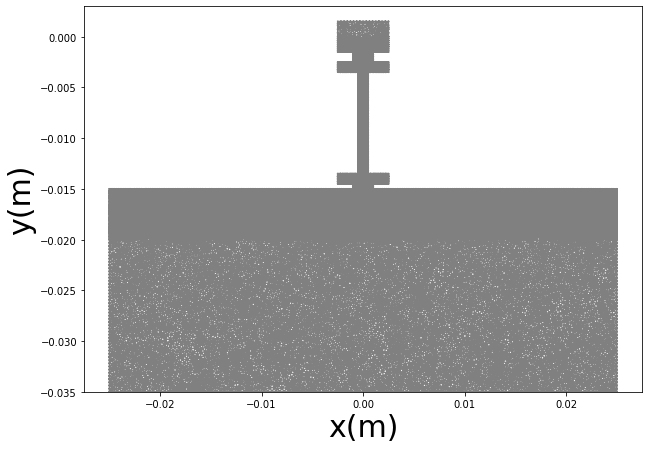

In [4]:
plot_cas_test(mesh_dict, liste_couples)

In [ ]:
first_time=True
main(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, phi_dict, physics_consts_dict, liste_couples, first_time)

with open("CAS_TEST_V2_liste_couples_testes.txt", "rb") as fp:
    liste_couples_testes = pickle.load(fp)
with open("CAS_TEST_V2_liste_Nb_out.txt", "rb") as fp:
    liste_Nb_out = pickle.load(fp)
with open("CAS_TEST_V2_liste_pf.txt", "rb") as fp:
    liste_pf = pickle.load(fp)
with open("CAS_TEST_V2_liste_alpha_moy.txt", "rb") as fp:
    liste_alpha_moy = pickle.load(fp)
with open("CAS_TEST_V2_liste_alpha_sigma.txt", "rb") as fp:
    liste_alpha_sigma = pickle.load(fp)
with open("CAS_TEST_V2_liste_V_moy.txt", "rb") as fp:
    liste_V_moy = pickle.load(fp)
with open("CAS_TEST_V2_liste_V_sigma.txt", "rb") as fp:
    liste_V_sigma = pickle.load(fp)
with open("CAS_TEST_V2_liste_alpha_detail.txt", "rb") as fp:
    liste_alpha_detail = pickle.load(fp)
with open("CAS_TEST_V2_liste_V_detail.txt", "rb") as fp:
    liste_V_detail = pickle.load(fp)
with open("CAS_TEST_V2_liste_V_detail_inside.txt", "rb") as fp:
    liste_V_detail_inside = pickle.load(fp)
    
liste_couples_testes = np.array(liste_couples_testes)
liste_Nb_out = np.array(liste_Nb_out)
liste_pf = np.array(liste_pf)
liste_alpha_moy = np.array(liste_alpha_moy)
liste_alpha_sigma = np.array(liste_alpha_sigma)
liste_V_moy = np.array(liste_V_moy)
liste_V_sigma = np.array(liste_V_sigma)
liste_alpha_detail = np.array(liste_alpha_detail)
liste_V_detail = np.array(liste_V_detail)
liste_V_detail_inside = np.array(liste_V_detail_inside)

In [ ]:
neutralisation_cas_test(liste_pf)

In [ ]:
vitesse_par_espece_cas_test(liste_V_moy,liste_V_sigma,liste_pf,liste_Nb_out)

In [ ]:
angle_par_espece_cas_test(liste_alpha_moy,liste_alpha_sigma,liste_pf,liste_Nb_out)

In [ ]:
vitesse_total_cas_test(liste_V_moy,liste_V_sigma,liste_pf,liste_Nb_out)

In [ ]:
angle_total_cas_test(liste_alpha_moy,liste_alpha_sigma,liste_pf,liste_Nb_out)

In [ ]:
num_cas=1

In [ ]:
distribution_vitesse_1_cas(liste_V_detail,num_cas)

In [ ]:
distribution_angle_1_cas(liste_alpha_detail,num_cas)

In [ ]:
distribution_vitesse_1_cas_inside(liste_V_detail_inside,num_cas)

In [3]:
import numpy as np
(2000)**2*np.pi*127*1.7e-27/(1.38e-23*8)

24574.994706885373